#**Data Analytics MCA441E CIA-3: Model Construction**

##**Assignment Description**

*Choose any domain of your interest and perform the following steps*

Step 1: Problem Formulation: Formulate specific questions for which you want
to find solutions using the data set

Step 2: Data Collection: Data set description, Data Storage plan

Step 3: EDA: Data preprocessing, Data visualization

Step 4: Model Design: Choice of model, Validation

Step 5: Inference: Visualization, Conclusion

Step 6: Documentation and Coding: Neat and formatted pdf and colab/solution
files with details of Step 1 to Step 5



Data Source: [House Price Prediction using Linear Regression](https://github.com/Shreyas3108/house-price-prediction)

**About the data**

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.
The dataset consisted of 21 variables and 21613 observations.

Datalink: https://raw.githubusercontent.com/mbharti321/dataBank/main/HousePricePrediction/kc_house_data.csv

##**Loading required libraries and the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
datasetLink = "https://raw.githubusercontent.com/mbharti321/dataBank/main/HousePricePrediction/kc_house_data.csv"
# data = pd.read_csv("kc_house_data.csv")
data = pd.read_csv(datasetLink)

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##**Exploratory Data Analysis (EDA)**

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Columns details:**

**id -** Unique ID for each home sold

**date -** Date of the home sale

**price -** Price of each home sold

**bedrooms -** Number of bedrooms

**bathrooms -** Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living -** Square footage of the apartments interior living space

**sqft_lot -** Square footage of the land space

**floors -** Number of floors

**waterfront -** A dummy variable for whether the apartment was overlooking the waterfront or not

**view -** An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,

**grade -** An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above -** The square footage of the interior housing space that is above ground level

**sqft_basement -** The square footage of the interior housing space that is below ground level

**yr_built -** The year the house was initially built

**yr_renovated -** The year of the house’s last renovation

**zipcode -** What zipcode area the house is in

**lat -** Lattitude

**long -** Longitude

**sqft_living15 -** The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15 -** The square footage of the land lots of the nearest 15 neighbors


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.size

453873

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


 ## **Preprocessing of data**

In [ ]:
#checking for NULL values
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**NOTE:** There aren't any null values in the dataset. So, we can directly proceed with visualization.

##**Visualization**

In [ ]:
data['bedrooms'].unique()
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


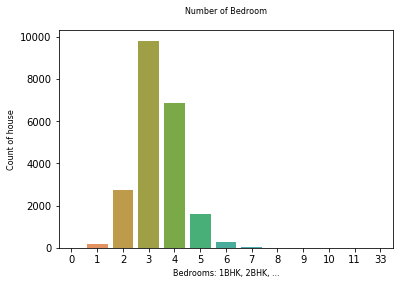

In [ ]:
b = sns.countplot(data['bedrooms'])
b.axes.set_title('Number of Bedroom\n', fontsize = 8)
b.set_xlabel('Bedrooms: 1BHK, 2BHK, ...', fontsize = 8)
b.set_ylabel('Count of house', fontsize = 8)
plt.show()



<function seaborn.utils.despine>

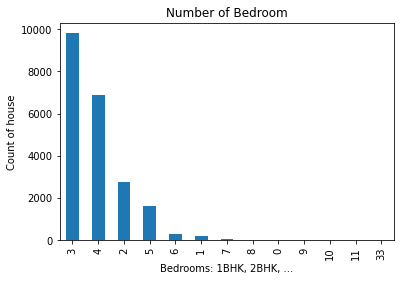

In [ ]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms: 1BHK, 2BHK, ...')
plt.ylabel('Count of house')
sns.despine

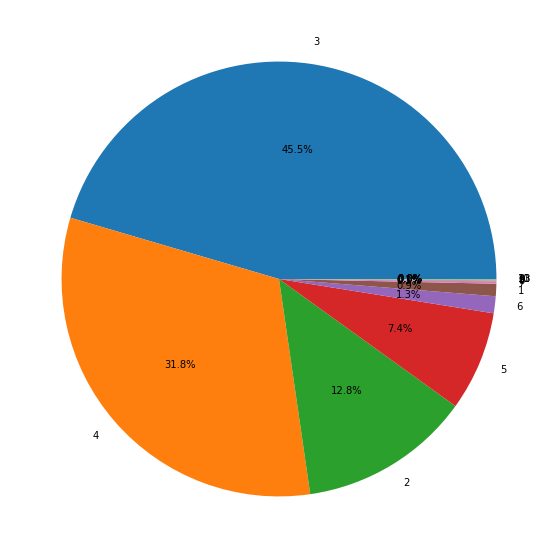

In [ ]:
sch = data.bedrooms.value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=sch.values(), labels=sch.keys(), autopct='%1.1f%%')
plt.show()

In [ ]:
# data['price'].max()
# data['price'].plot(kind='hist', figsize=(20, 10), bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

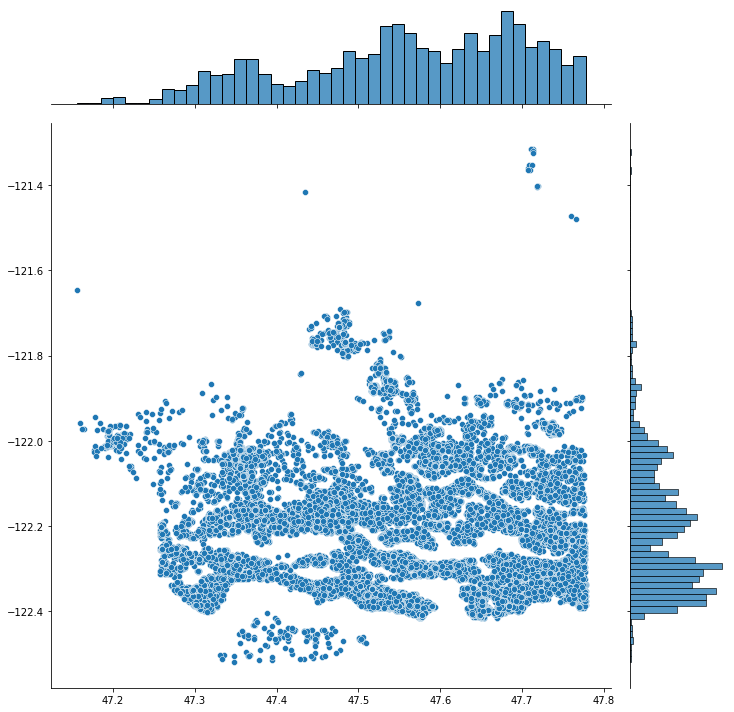

<function seaborn.utils.despine>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt
sns.despine

Text(0, 0.5, 'sqft_living')

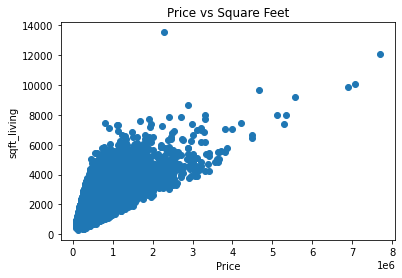

In [ ]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel('Price')
plt.ylabel("sqft_living")


In [ ]:
# plt.scatter(data.sqft_living, data.price)
# plt.title("Price vs Square Feet")
# plt.ylabel('Price')
# plt.xlabel("sqft_living")

Text(0, 0.5, 'Longitude')

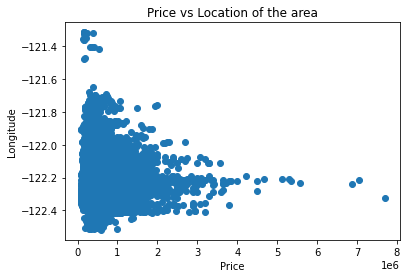

In [ ]:
plt.scatter(data.price,data.long)
# plt.scatter(data.long, data.price)
plt.title("Price vs Location of the area")
plt.xlabel('Price')
plt.ylabel("Longitude")

Text(0.5, 1.0, 'Latitude vs Price')

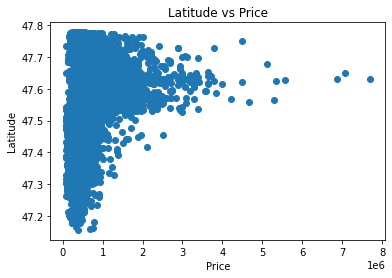

In [ ]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

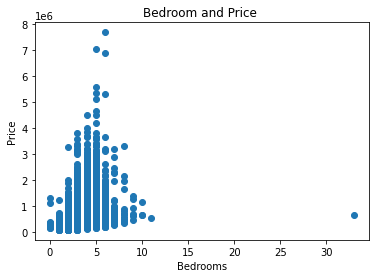

<function seaborn.utils.despine>

In [ ]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

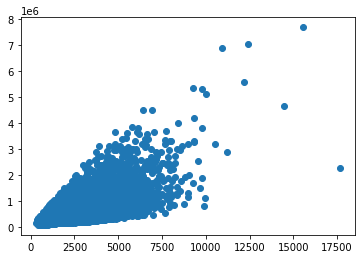

In [ ]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0 = no waterfront)')

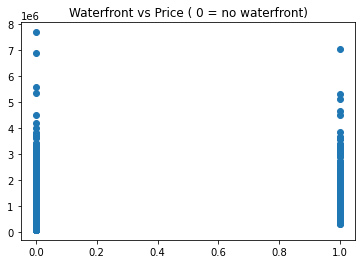

In [ ]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0 = no waterfront)")

In [ ]:
#dropping the columns which are not required.
train1 = data.drop(['id', 'price'],axis=1)

In [ ]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


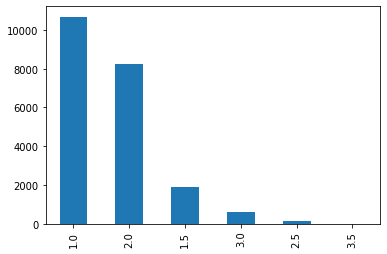

In [ ]:
data.floors.value_counts().plot(kind='bar')

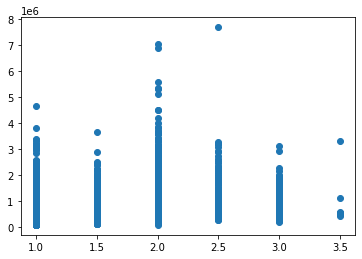

In [ ]:
plt.scatter(data.floors,data.price)

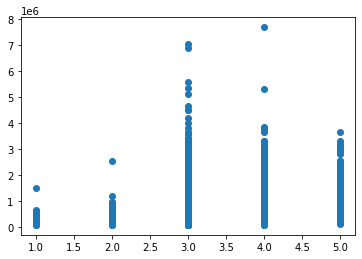

In [ ]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

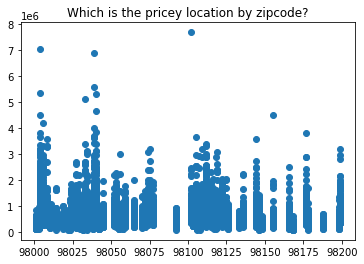

In [ ]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

##**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [ ]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(x_test,y_test)

0.7320342760357625

##**Gradient Boosting Regressor**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import ensemble

In [ ]:
params = {'n_estimators': 400, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.08, 'loss': 'ls'}

In [ ]:
clf = ensemble.GradientBoostingRegressor(**params)

In [ ]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf.score(x_test,y_test)

0.9253376229955638

In [ ]:
test_score = np.zeros((params['n_estimators'],),dtype=np.float64)

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i]=clf.loss_(y_test,y_pred)

Text(0, 0.5, 'Deviance')

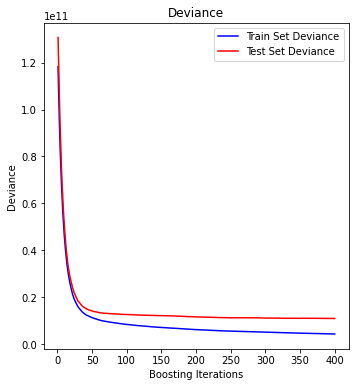

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators'])+1,clf.train_score_,'b-',label= 'Train Set Deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score,'r-',label = 'Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

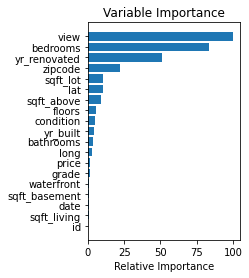

In [ ]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

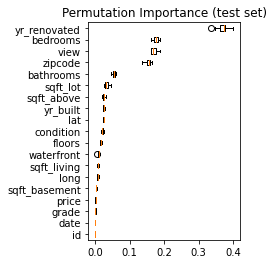

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(data.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
# fig.tight_layout()
plt.show()

## **References**

1.  https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
2.  https://www.kaggle.com/mohammadhy/eda-statistic-ml
3.  https://www.kaggle.com/shivachandel/kc-house-data/
4.  https://www.kaggle.com/harlfoxem/housesalesprediction